<a href="https://colab.research.google.com/github/pksi/pyTorch_DL_models/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed Sep 13 05:13:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.0.1+cu118


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor

# Setup training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 267170332.19it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 6794306.68it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 82098450.80it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21214397.29it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

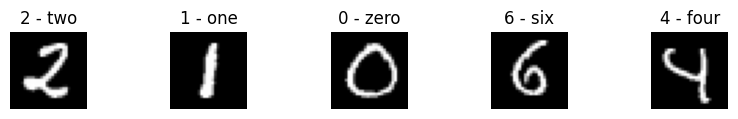

In [4]:
# Method 1: Use fig.add_subplot() method
import matplotlib.pyplot as plt
import random
class_names=train_data.classes
fig=plt.figure(figsize=(10,1))
for i in range (1,6):
  rand_idx = random.randint(0,len(train_data))
  fig.add_subplot(1,5,i)
  image,label=train_data[rand_idx]
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

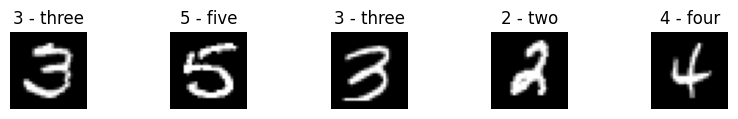

In [5]:
# Method 2: Use plt.subplots function
fig, ax = plt.subplots(1,5,figsize=(10,1))
for i in range (0,5):
  rand_idx = random.randint(0,len(train_data))
  image,label=train_data[rand_idx]
  ax[i].imshow(image.squeeze(), cmap='gray')
  ax[i].axis('off')
  ax[i].set_title(class_names[label])

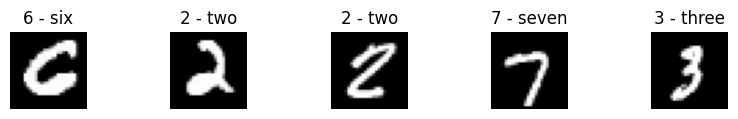

In [6]:
# Method 3: Use plt.subplot function
plt.figure (figsize=(10,1))
for i in range (1,6):
  rand_idx = random.randint(0,len(train_data))
  plt.subplot(1,5,i)
  image,label=train_data[rand_idx]
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

In [7]:
image, label = train_data[5]
image.shape

torch.Size([1, 28, 28])

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [8]:
from torch.utils.data import DataLoader
train_dataloader= DataLoader(train_data,
                       batch_size=32,
                       shuffle=True
                       )
test_dataloader= DataLoader(test_data,
                       batch_size=32,
                       shuffle=True
                       )

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [9]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
from torch import nn
class MINISTV0(nn.Module):
  def __init__(self,hidden_units,output_shape):
    super().__init__()
    self.block1=nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=hidden_units, kernel_size=3, stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride =2)
    )
    self.block2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride =2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*4*4, out_features= output_shape)
    )
  def forward (self,x):
    x = self.block1(x)
    x = self.block2(x)
    x = self.classifier(x)
    return x

model0 = MINISTV0(10,len(class_names)).to(device)
model0

MINISTV0(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)

In [10]:
model0(image.unsqueeze(dim=0).to(device))

tensor([[ 0.0844,  0.0889, -0.0610,  0.0231,  0.0415, -0.0572,  0.0514,  0.0186,
         -0.0818,  0.0094]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [11]:
conv_layer = nn.Conv2d(in_channels=1,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
conv_layer(image).shape

torch.Size([10, 26, 26])

In [12]:
"""
The nn.Flatten() operation will flatten all dimensions of the input tensor except for the batch dimension.
nn.Flatten() layer expects a 4-dimensional tensor as input with size (N, C, H, W).
If the input is a 3-dimensional tensor, it considers the first dimension as the batch dimension and will not flattern this dimension.
"""
flatten_layer = nn.Flatten()
flatten_layer(conv_layer(image.unsqueeze(dim=0))).shape

torch.Size([1, 6760])

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [13]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [14]:
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [15]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [16]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.1)
from helper_functions import accuracy_fn

In [17]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

## Train model on cpu
# train_time_start_cpu = timer()
# epochs = 5
# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}\n---------")
#     train_step(data_loader=train_dataloader,
#         model=model0,
#         loss_fn=loss_fn,
#         optimizer=optimizer,
#         accuracy_fn=accuracy_fn,
#         device='cpu'
#     )
#     test_step(data_loader=test_dataloader,
#         model=model0,
#         loss_fn=loss_fn,
#         accuracy_fn=accuracy_fn,
#         device="cpu"
#     )
# train_time_end_cpu = timer()
# total_train_time_cpu = print_train_time(start=train_time_start_cpu,
#                                            end=train_time_end_cpu,
#                                            device='CPU')

In [18]:
# Train model on GPU
train_time_start_gpu = timer()
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model0,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device= device
    )
    test_step(data_loader=test_dataloader,
        model=model0,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )
train_time_end_gpu = timer()
total_train_time_gpu = print_train_time(start=train_time_start_gpu,
                                           end=train_time_end_gpu,
                                           device='GPU')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.32851 | Train accuracy: 88.89%
Test loss: 0.06840 | Test accuracy: 97.90%

Epoch: 1
---------
Train loss: 0.08182 | Train accuracy: 97.52%
Test loss: 0.06626 | Test accuracy: 97.98%

Epoch: 2
---------
Train loss: 0.06287 | Train accuracy: 98.05%
Test loss: 0.05215 | Test accuracy: 98.36%

Epoch: 3
---------
Train loss: 0.05561 | Train accuracy: 98.28%
Test loss: 0.04240 | Test accuracy: 98.65%

Epoch: 4
---------
Train loss: 0.04814 | Train accuracy: 98.50%
Test loss: 0.03639 | Test accuracy: 98.74%

Train time on GPU: 68.939 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [19]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [20]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=5):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (2 - two)


In [21]:
# Make predictions on test samples with model
pred_probs= make_predictions(model=model0,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[3.3206e-09, 4.8133e-07, 1.0000e+00, 5.6798e-07, 1.7870e-14, 1.0712e-16,
         1.1172e-13, 2.0354e-07, 8.5676e-07, 4.4256e-10],
        [2.3893e-06, 9.9873e-01, 1.0795e-06, 7.9193e-07, 3.8763e-04, 1.9287e-04,
         6.8364e-05, 1.2783e-04, 4.4053e-04, 4.9015e-05]])

In [22]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
test_labels, pred_classes

([2, 1, 2, 4, 6], tensor([2, 1, 2, 4, 6]))

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?